In [1]:
import librosa
import pandas as pd
import numpy as np
import scipy.io.wavfile as wav
import os
import csv
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras import initializers
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, average_precision_score

In [2]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [3]:
folder = "Ambulance data" # change relative path here to look for original Ambulance data .wav
features=[] 
labels=[] 
files = os.listdir(f'../{folder}')
for filename in files:
    path = os.path.join('../', folder, filename)
    y, sr = librosa.load(path)
    data = padding(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12),12,900)
    features.append(data)
    labels.append(1)
    
# features = np.vstack(features)
Amb_df = pd.DataFrame({'file_name': files, 'features': features, 'labels': labels})
Amb_df

,file_name,features,labels
0,ambulance864.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,ambulance870.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,ambulance858.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,ambulance680.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,ambulance694.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
...,...,...,...
927,ambulance666.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
928,ambulance855.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
929,ambulance699.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
930,ambulance841.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1


In [4]:
folder = "Road Noises" # change relative path here to look for original Road data .wav
features=[] 
labels=[] 
files = os.listdir(f'../{folder}')
for filename in files:
    path = os.path.join('../', folder, filename)
    y, sr = librosa.load(path, duration=7)
    data = padding(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12),12,900)
    features.append(data)
    labels.append(0)
    
# features = np.vstack(features)
RN_df = pd.DataFrame({'file_name': files, 'features': features, 'labels': labels})
RN_df

,file_name,features,labels
0,road363.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,road405.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
2,road411.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,road377.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
4,road439.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
...,...,...,...
897,road352.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
898,road434.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
899,road420.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
900,road346.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [5]:
# combine two df
total_df = pd.concat([Amb_df, RN_df])
total_df

,file_name,features,labels
0,ambulance864.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,ambulance870.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,ambulance858.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,ambulance680.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,ambulance694.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
...,...,...,...
897,road352.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
898,road434.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
899,road420.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
900,road346.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [6]:
# import data shuffled by Jerry
train_df = pd.read_csv('../Data/processed_data/train.csv') #change path here for shuffled data
train_file_name = train_df['filename']
train_df = total_df[total_df['file_name'].isin(train_file_name)].set_index('file_name').loc[train_file_name].reset_index()


test_df = pd.read_csv('../Data/processed_data/test.csv') #change path here for shuffled data
test_file_name = test_df['filename']
test_df = total_df[total_df['file_name'].isin(test_file_name)].set_index('file_name').loc[test_file_name].reset_index()

val_df = pd.read_csv('../Data/processed_data/validation.csv') #change path here for shuffled data
val_file_name = val_df['filename']
val_df = total_df[total_df['file_name'].isin(val_file_name)].set_index('file_name').loc[val_file_name].reset_index()

In [7]:
X_train = train_df['features']
y_train = train_df['labels']
X_test = test_df['features']
y_test = test_df['labels']
X_val = val_df['features']
y_val = val_df['labels']

In [8]:
mfcc_max = np.array(X_train.to_list()).max(axis=0).max(axis=1)
mfcc_min = np.array(X_train.to_list()).min(axis=0).min(axis=1)
X_train_std = X_train.apply(lambda x: (x - mfcc_min[:,None]) / (mfcc_max[:,None] - mfcc_min[:,None]))
X_test_std = X_test.apply(lambda x: (x - mfcc_min[:,None]) / (mfcc_max[:,None] - mfcc_min[:,None]))
X_val_std = X_val.apply(lambda x: (x - mfcc_min[:,None]) / (mfcc_max[:,None] - mfcc_min[:,None]))

In [19]:
def build_model(input_shape=(12,900), n_classes=1):
    """Return a simple logistic regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(1)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(12,input_shape=input_shape,return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(12))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.1))
    # # model.add(tf.keras.layers.Dense(3, activation='relu'))
    # # model.add(tf.keras.layers.Dropout(0.1))
    
    model.add(tf.keras.layers.Dense(
        units=n_classes,
        use_bias=True,
        activation='sigmoid',
        name='Output'
        ))
    model.summary()
    

    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate = 0.001),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

    return model

In [20]:
# build model
model = build_model()

# train model
num_epochs = 200
batch_size=50

history = model.fit(
                x=np.array(X_train_std.to_list()),
                y=y_train,
                epochs=num_epochs,
                batch_size=batch_size,
                validation_data = (np.array(X_val_std.to_list()), y_val),
                verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 12)            43824     
                                                                 
 dropout (Dropout)           (None, 12, 12)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense (Dense)               (None, 5)                 65        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 Output (Dense)              (None, 1)                 6

2023-08-03 23:30:01.792697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:30:02.017796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:30:02.093968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:30:02.284029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:30:02.403251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - ETA: 0s - loss: 0.7041 - binary_accuracy: 0.4973

2023-08-03 23:30:03.430970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:30:03.505059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:30:03.557170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 3s 52ms/step - loss: 0.7041 - binary_accuracy: 0.4973 - val_loss: 0.6947 - val_binary_accuracy: 0.4836
Epoch 2/200
26/26 [==============================] - 0s 18ms/step - loss: 0.7007 - binary_accuracy: 0.4949 - val_loss: 0.6973 - val_binary_accuracy: 0.4836
Epoch 3/200
26/26 [==============================] - 0s 17ms/step - loss: 0.7030 - binary_accuracy: 0.5035 - val_loss: 0.6959 - val_binary_accuracy: 0.4836
Epoch 4/200
26/26 [==============================] - 0s 19ms/step - loss: 0.7031 - binary_accuracy: 0.4981 - val_loss: 0.7070 - val_binary_accuracy: 0.4836
Epoch 5/200
26/26 [==============================] - 0s 18ms/step - loss: 0.7120 - binary_accuracy: 0.4988 - val_loss: 0.6971 - val_binary_accuracy: 0.4836
Epoch 6/200
26/26 [==============================] - 0s 17ms/step - loss: 0.7085 - binary_accuracy: 0.4981 - val_loss: 0.6930 - val_binary_accuracy: 0.5018
Epoch 7/200
26/26 [==============================] - 0s 18ms/step - loss: 0.

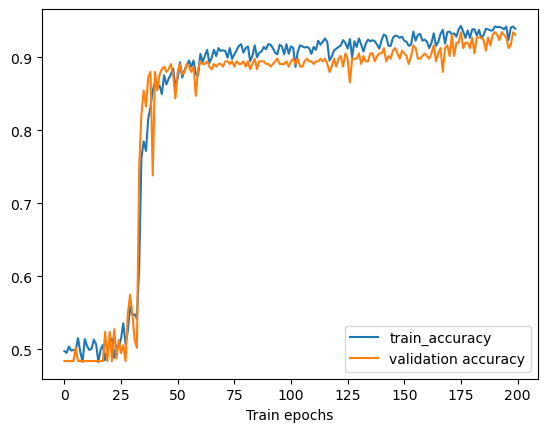

9/9 [==============================] - 0s 20ms/step - loss: 0.1674 - binary_accuracy: 0.9348


In [21]:
train_accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
plt.plot(train_accuracy, label='train_accuracy')
plt.plot(val_accuracy, label='validation accuracy')
plt.xlabel('Train epochs')
plt.legend()
plt.show()

test_accuracy = model.evaluate(x=np.array(X_test_std.to_list()), y=y_test, verbose=1,
                             return_dict=True)['binary_accuracy']

2023-08-03 23:36:07.934869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:36:08.004308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 23:36:08.117759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 8ms/step
Training, misclassified examples: 63
Training, prediction accuracy: 0.951
------------
Training, misclassified examples: 19
Training, prediction accuracy: 0.931
------------
Test, misclassified examples: 18
Test, prediction accuracy: 0.935


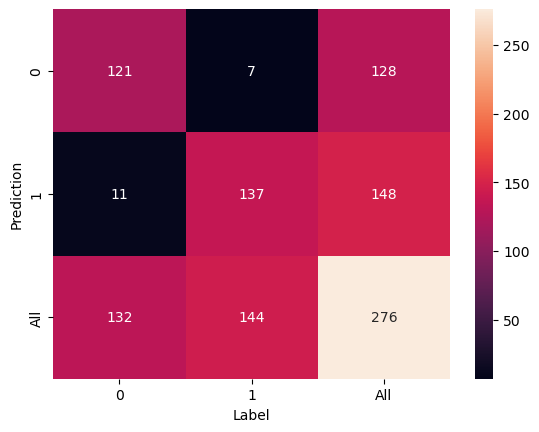

In [22]:
y_train_pred = model.predict(x=np.array(X_train_std.to_list())).flatten()

# apply the threshold function to create a 0, 1 outcome
y_train_pred = np.where(y_train_pred>=0.5, 1, 0)


y_validation_pred = model.predict(x=np.array(X_val_std.to_list())).flatten()
y_validation_pred = np.where(y_validation_pred>=0.5, 1, 0)


# run the trained model on the test data (the model outputs probabilities)
y_pred_prob = model.predict(x=np.array(X_test_std.to_list())).flatten()
# apply the threshold function to create a 0, 1 outcome
y_pred = np.where(y_pred_prob>=0.5, 1, 0)


# print accuracy for train
print('Training, misclassified examples: %d' % (y_train != y_train_pred).sum())
error_train_tf = (y_train != y_train_pred).sum()/len(y_train_pred)
print('Training, prediction accuracy: %.3f'% (1-error_train_tf))

print('------------')
print('Training, misclassified examples: %d' % (y_val != y_validation_pred).sum())
error_train_tf = (y_val != y_validation_pred).sum()/len(y_validation_pred)
print('Training, prediction accuracy: %.3f'% (1-error_train_tf))

print('------------')

# print accuracy for test

print('Test, misclassified examples: %d' % (y_test != y_pred).sum())
error_test_tf = (y_test != y_pred).sum()/len(y_pred)
print('Test, prediction accuracy: %.3f'% (1-error_test_tf))

confusion_matrix = pd.crosstab(y_pred,y_test, rownames=['Prediction'], colnames=['Label'],margins = True)
sns.heatmap(confusion_matrix, annot=True,fmt='g')
pass

In [25]:
# Looking at precision, recall and F1 scores
print('Precision score: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall score: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('F1 score %.3f' % f1_score(y_test, y_pred, average='macro'))

Precision score: 0.935
Recall score: 0.934
F1 score 0.935


In [26]:
# Looking at the classification report
print('\n Classification report for k=5:\n', classification_report(y_test, y_pred))


 Classification report for k=5:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       132
           1       0.93      0.95      0.94       144

    accuracy                           0.93       276
   macro avg       0.94      0.93      0.93       276
weighted avg       0.94      0.93      0.93       276



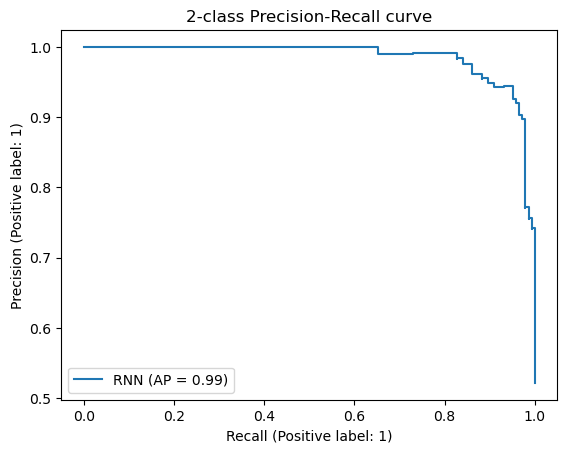

In [27]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred_prob, name="RNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
pd.DataFrame(y_pred_prob).to_csv('../Data/model_predictions/RNN_model.csv')